In [2]:
import torch
from torch import nn
from zer0t0rch import Zer0t0rchWrapper
from zer0t0rch.utils import clear_cache, get_accuracy
from torchvision import transforms, datasets, models

clear_cache()

In [4]:
T = transforms.Compose(
    [
     transforms.Resize((224, 224)),
     transforms.ToTensor()
    ]
)

# grabbing the data
data = datasets.CIFAR10("data/", train=True, download=True, transform=T)
test_data = datasets.CIFAR10("data/", train=False, download=True, transform=T)

# neural net
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 10)

# grabbing the loss fn and metric fns
loss_fn = nn.CrossEntropyLoss()
metric_fns = {'acc': get_accuracy} # this needs to be a dict with metric name as the key and the corresponding fn as the value

Files already downloaded and verified
Files already downloaded and verified


In [5]:
zt_model = Zer0t0rchWrapper(model)
zt_model.prepare_data(data, batch_size=64, val_pct=0.2) # pass in the train data with batch size and validation split percent
zt_model.compile(loss_fn, metric_fns) # pass in the loss fn and metric fns

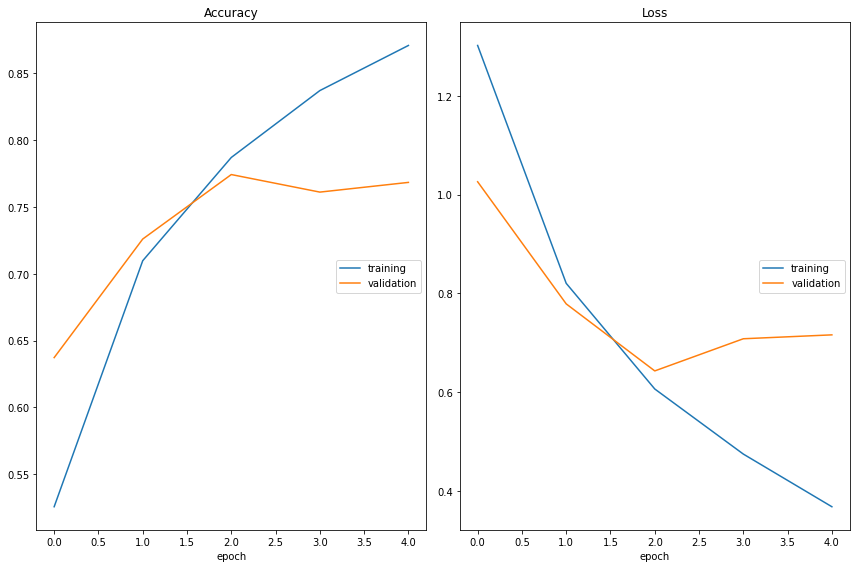

In [6]:
zt_model.fit(num_epochs=5, plot_graphs=True) # fit for num_epochs, keep track of metrics visually by setting plot_graphs=True

In [7]:
zt_model.fit(num_epochs=2) # or do this if don't like to look at the plots but still want to keep track of metrics

 val : epoch=1, loss=0.7047, acc=0.7930: 100%|██████████| 157/157 [00:14<00:00, 10.65it/s]


In [8]:
zt_model.fit(num_epochs=2, on_single_batch=True) # overfit on a single batch

train: epoch=0, loss=0.1614, acc=0.9688
 val : epoch=0, loss=2.0483, acc=0.5781
train: epoch=1, loss=0.8886, acc=0.7344
 val : epoch=1, loss=6.2209, acc=0.4062


In [9]:
zt_model.test(test_data) # test the model on test_data

loss=5.4626, acc=0.3950: 100%|██████████| 157/157 [00:14<00:00, 10.79it/s]


In [10]:
# zt_model.predict() # can be used for inference
# zt_model.model() # or use this if you prefer the PyTorch way

In [11]:
# zer0t0rch comes with adam(with lr=3e-4) as the default optimizer
# if you want to use something else, just inherit the wrapper class and override the required method(refer to the source code to learn more about the methods)
class ZTModelSGD(Zer0t0rchWrapper):
    def __init__(self, model, device):
        super().__init__(model, device)

    def configure_optimizer(self):
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=1e-2)

In [12]:
zt_model_sgd = ZTModelSGD(model, device)
print(zt_model_sgd.optimizer) # let's have a look at the optimizer which is being used under the hood

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
# and the rest remains the same
zt_model_sgd.prepare_data(data, batch_size=64, val_pct=0.2)
zt_model_sgd.compile(loss_fn, metric_fns)
zt_model_sgd.fit(num_epochs=1)